# STAT207 Mini-Project #2 - Fifa Rankings


Austin Kirwin

**Delete this code block before submitting**

You should delete and add cells as you see fit.

Don't forget to put written text in **markdown** cells. To change a cell from a <u>code block</u> to a <u>markdown cell</u>:
* Click on the cell you'd like to modify.
* Go to 'Cell' at the top of the page.
* Go to 'Cell Type' in the drop down menu and click on either 'Code' or 'Markdown'.


In [39]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

## 1. Introduction

### Primary Research Goal: Build a predictive model that will effectively predict "Streams" for new datasets.

#### Seconday Research Goal: The predictive model yields reliable insight about the nature of the relationship between the variables in the dataset.

The explanatory variables being considered are "in_spotify_charts", "danceability_%", "valence_%", "energy_%" and "acousticness_%".

Research Motivation: Artists may want to know how each of these variables affects the number of streams a song gets on Spotify since more streams means more exposure and sales.

## 2. Dataset Discussion

I found the spotify-2023.csv file on Kaggle (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023) and downloaded it 2/11/2024.

In [40]:
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
#First 5 rows
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [41]:
#Pre-cleaning number of rows
df.shape[0]

953

## 3. Dataset Cleaning

First I am dropping all rows with explicit NA values. Then I check for implicit values and drop those as well. Finally I get rid of an outlier (most likely a type) and create a data frame with just the columns I want to analyze.

In [42]:
df_clean = df.dropna()
df_clean

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [43]:
#Checking for implicit values
df_clean.dtypes
pd.set_option('display.max_rows',None)
df_clean[['streams']].reset_index()
df_clean.iloc[478]
df_clean = df_clean[df_clean['track_name'] != 'Love Grows (Where My Rosemary Goes)']
#The streams for this track were improperly inputted and the entire string in place of streams cannot be viewed; therefore it is being removed by name
df_clean[['streams']] = df_clean[['streams']].astype('float')
#Streams is still of dtype 'object' so it is being converted to float (the values are too large to be ints)
df_clean.dtypes
pd.reset_option('display.max_rows')
df_clean

C:\Users\diamo\AppData\Local\Temp\ipykernel_5160\3511312894.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['streams']] = df_clean[['streams']].astype('float')


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


In [44]:
df_clean = df_clean[df_clean['streams'] > 3000]
df_clean[['streams']].min()

streams    1365184.0
dtype: float64

In [45]:
df2 = df_clean[['streams','in_spotify_playlists','danceability_%','valence_%','energy_%','acousticness_%']]
df2

,streams,in_spotify_playlists,danceability_%,valence_%,energy_%,acousticness_%
0,141381703.0,553,80,89,83,31
1,133716286.0,1474,71,61,74,7
2,140003974.0,1397,51,32,53,17
3,800840817.0,7858,55,58,72,11
4,303236322.0,3133,65,23,80,14
...,...,...,...,...,...,...
948,91473363.0,953,60,24,39,57
949,121871870.0,1180,42,7,24,83
950,73513683.0,573,80,81,67,4
951,133895612.0,1320,82,67,77,8


There did not seem to be any explicit NA values but there was one implicit NA value in streams.

## 4. Preliminary Analysis

A pairplot, linear regression, and residual plot to determine the fit of the data set.

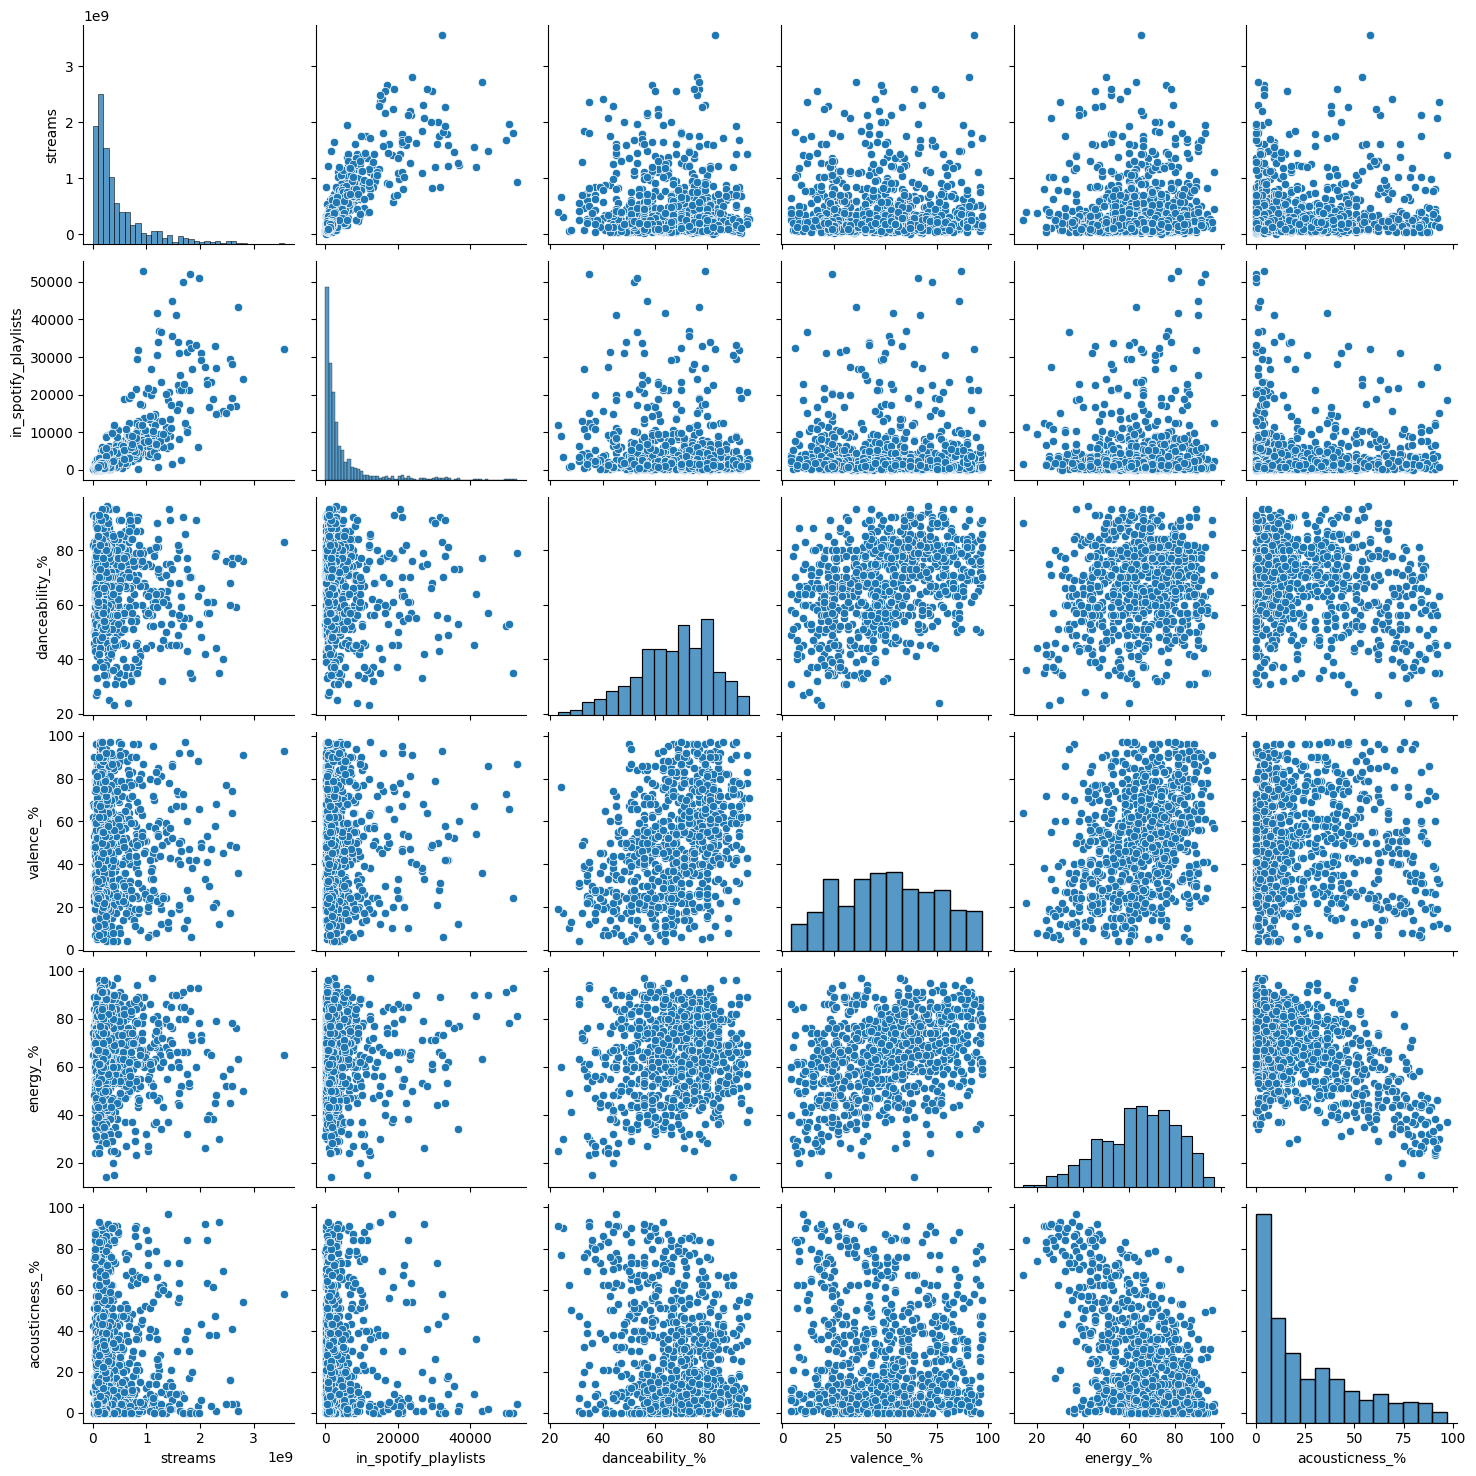

In [46]:
sns.pairplot(df2)
plt.show()

In [47]:
df2 = df2.rename(columns={"danceability_%": "danceability", "energy_%": "energy", "valence_%": "valence", "acousticness_%" : "acousticness"})
df2

,streams,in_spotify_playlists,danceability,valence,energy,acousticness
0,141381703.0,553,80,89,83,31
1,133716286.0,1474,71,61,74,7
2,140003974.0,1397,51,32,53,17
3,800840817.0,7858,55,58,72,11
4,303236322.0,3133,65,23,80,14
...,...,...,...,...,...,...
948,91473363.0,953,60,24,39,57
949,121871870.0,1180,42,7,24,83
950,73513683.0,573,80,81,67,4
951,133895612.0,1320,82,67,77,8


In [48]:
full_model = smf.ols(formula='streams~in_spotify_playlists+danceability+energy+acousticness+valence', data=df2).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     256.6
Date:                Sun, 31 Mar 2024   Prob (F-statistic):          3.71e-164
Time:                        16:22:56   Log-Likelihood:                -17130.
No. Observations:                 815   AIC:                         3.427e+04
Df Residuals:                     809   BIC:                         3.430e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.351e+08   8.93e+07      3.753      0.000     1.6e+08     5.1e+08
in_spotify_playlists  5.284e+04   1489.821     35.469      0.000    4.99e+04    5.58e+04
danceability         -1.298e+05   8.87e+05     -0.146      0.884   -1.87e+06    1.61e+06
energy               -1.772e+06   9.29e+05     -1.909      0.057   -3.59e+06    5.05e+04
acousticness          2.758e+05   5.69e+05      0.485      0.628   -8.41e+05    1.39e+06
valence              -1.302e+05   5.75e+05     -0.226      0.821   -1.26e+06    9.99e+05
==============================================================================
Omnibus:                      233.957   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1842.135
Skew:                           1.072   Prob(JB):                         0.00
Kurtosis:                      10.046   Cond. No.                     7.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

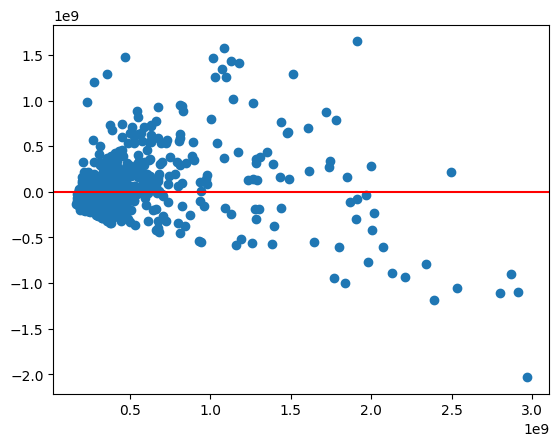

In [49]:
plt.scatter(full_model.fittedvalues, full_model.resid)
plt.axhline(y=0, color='r')
plt.show()

For the most part, the residuals seem to have an even spread above and below the line of best fit which means it satisfies the linearity assumption.

There are no categorical explanatory variables being used to determine the number of streams so there are no interactions to observe between pairs of categorical and numerical explanatory variables.

## 5. Predictive Models

In this section I will be using a Backwards Elimination Algorithm, in comparison with a non-regularized linear regression, to try to determine the linear regression model with the highest R^2 value.

In [50]:
df_train, df_test = train_test_split(df2, test_size=.2, random_state=207)

In [51]:
df_train

,streams,in_spotify_playlists,danceability,valence,energy,acousticness
479,1.356114e+08,353,49,42,77,3
188,1.641427e+09,21106,63,46,85,1
685,2.280566e+09,33032,78,58,45,47
821,7.142332e+07,2939,76,79,81,18
308,7.436936e+08,7461,71,90,73,30
...,...,...,...,...,...,...
296,1.829993e+09,32502,70,6,73,1
92,2.503052e+08,1962,68,14,76,4
490,6.082286e+08,2482,80,42,68,2
672,1.929770e+09,33206,91,42,60,0


In [52]:
df_test

,streams,in_spotify_playlists,danceability,valence,energy,acousticness
266,1.628871e+08,432,93,47,47,33
633,8.656401e+08,5728,75,19,46,21
43,1.047101e+09,13387,56,58,56,37
8,9.521732e+07,1096,85,22,62,12
467,7.398129e+07,827,51,51,66,67
...,...,...,...,...,...,...
60,1.119477e+08,731,86,59,96,50
39,1.765535e+08,584,79,96,85,27
697,3.686469e+08,9514,44,8,20,74
280,2.070333e+08,1638,69,36,90,1


In [53]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(df_train)
df_train = pd.DataFrame(scaled_train, columns=df_train.columns)
df_train

,streams,in_spotify_playlists,danceability,valence,energy,acousticness
0,-0.655048,-0.581986,-1.319328,-0.399518,0.774102,-0.902888
1,2.221058,1.991722,-0.349071,-0.228624,1.284300,-0.982306
2,3.441813,3.470739,0.690489,0.284059,-1.266694,0.844300
3,-0.777647,-0.261280,0.551881,1.181255,1.029201,-0.307256
4,0.506388,0.299521,0.205361,1.651214,0.519002,0.169250
...,...,...,...,...,...,...
647,2.581219,3.405010,0.136057,-1.937567,0.519002,-0.982306
648,-0.435983,-0.382444,-0.002551,-1.595778,0.710327,-0.863180
649,0.247650,-0.317955,0.829097,-0.399518,0.200128,-0.942597
650,2.771794,3.492317,1.591442,-0.399518,-0.310071,-1.022015


In [54]:
scaler2 = StandardScaler()
scaled_test = scaler2.fit_transform(df_test)
df_test = pd.DataFrame(scaled_test, columns=df_test.columns)
df_test

,streams,in_spotify_playlists,danceability,valence,energy,acousticness
0,-0.521946,-0.587307,1.819530,-0.135292,-0.870879,0.160103
1,0.833337,0.259887,0.649319,-1.285144,-0.927661,-0.293098
2,1.183291,1.485087,-0.585903,0.316436,-0.359847,0.311170
3,-0.652449,-0.481088,1.299437,-1.161946,-0.019159,-0.632998
4,-0.693404,-0.524119,-0.910962,0.028973,0.207966,1.444172
...,...,...,...,...,...,...
158,-0.620184,-0.539476,1.364448,0.357502,1.911406,0.802137
159,-0.495590,-0.562992,0.909366,1.876951,1.286811,-0.066497
160,-0.125131,0.865529,-1.366044,-1.736872,-2.403975,1.708539
161,-0.436808,-0.394385,0.259249,-0.587019,1.570718,-1.048432


### 5.1 Non-Regularized Linear Regression Full Model

In [55]:
train_feature = df_train.drop(['streams'], axis=1)
train_target = df_train['streams']

In [56]:
linreg = LinearRegression()
linreg.fit(train_feature, train_target)

LinearRegression()

In [57]:
test_feature = df_test.drop(['streams'], axis=1)
test_target = df_test['streams']

In [58]:
linreg.score(test_feature,test_target)

0.649901167252205

### 5.3 Feature Selection
--5.2 was skipped because there are no interaction terms to consider

In [59]:
linreg_playlist = LinearRegression()
linreg_playlist.fit(train_feature.drop(['in_spotify_playlists'], axis=1), train_target)
linreg_playlist.score(test_feature.drop(['in_spotify_playlists'], axis=1), test_target)

-0.004633213720477203

In [60]:
linreg_dance = LinearRegression()
linreg_dance.fit(train_feature.drop(['danceability'], axis=1), train_target)
linreg_dance.score(test_feature.drop(['danceability'], axis=1), test_target)

0.6525035165026112

In [61]:
linreg_val = LinearRegression()
linreg_val.fit(train_feature.drop(['valence'], axis=1), train_target)
linreg_val.score(test_feature.drop(['valence'], axis=1), test_target)

0.6497583546202259

In [62]:
linreg_energy = LinearRegression()
linreg_energy.fit(train_feature.drop(['energy'], axis=1), train_target)
linreg_energy.score(test_feature.drop(['energy'], axis=1), test_target)

0.6484751350293774

In [63]:
linreg_acoustic = LinearRegression()
linreg_acoustic.fit(train_feature.drop(['acousticness'], axis=1), train_target)
linreg_acoustic.score(test_feature.drop(['acousticness'], axis=1), test_target)

0.6501877951673221

Based on the Backwards Elimination Algorithm, the model with the highest test R^2 is the linear regression model without 'danceability' in it with a greatest R^2 value of 0.6525035165026112.

## 6. Best Model Discussion

Based on the test R^2 values of the non-regularized linear regression and the best performing linear regression from the Backwards Elimination Algorithm, the linear regression model that would perform best at predicting the number of streams of songs in new datasets would be the linear regression model without the explanatory variable 'danceability'.

In [64]:
#Backwards Elim Algo
print(linreg_dance.score(test_feature.drop(['danceability'], axis=1), test_target))
#Non-reg
print(linreg.score(test_feature,test_target))

0.6525035165026112
0.649901167252205


In [65]:
best_model = smf.ols(formula='streams~in_spotify_playlists+valence+energy+acousticness', data=df_train).fit()
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     254.3
Date:                Sun, 31 Mar 2024   Prob (F-statistic):          3.59e-131
Time:                        16:22:56   Log-Likelihood:                -617.13
No. Observations:                 652   AIC:                             1244.
Df Residuals:                     647   BIC:                             1267.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.735e-17      0.025  -7.08e-16      1.000      -0.048       0.048
in_spotify_playlists     0.7816      0.025     31.740      0.000       0.733       0.830
valence                 -0.0112      0.027     -0.424      0.672      -0.063       0.041
energy                  -0.0520      0.032     -1.626      0.104      -0.115       0.011
acousticness             0.0230      0.030      0.764      0.445      -0.036       0.082
==============================================================================
Omnibus:                      181.370   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1242.062
Skew:                           1.054   Prob(JB):                    1.95e-270
Kurtosis:                       9.425   Cond. No.                         2.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

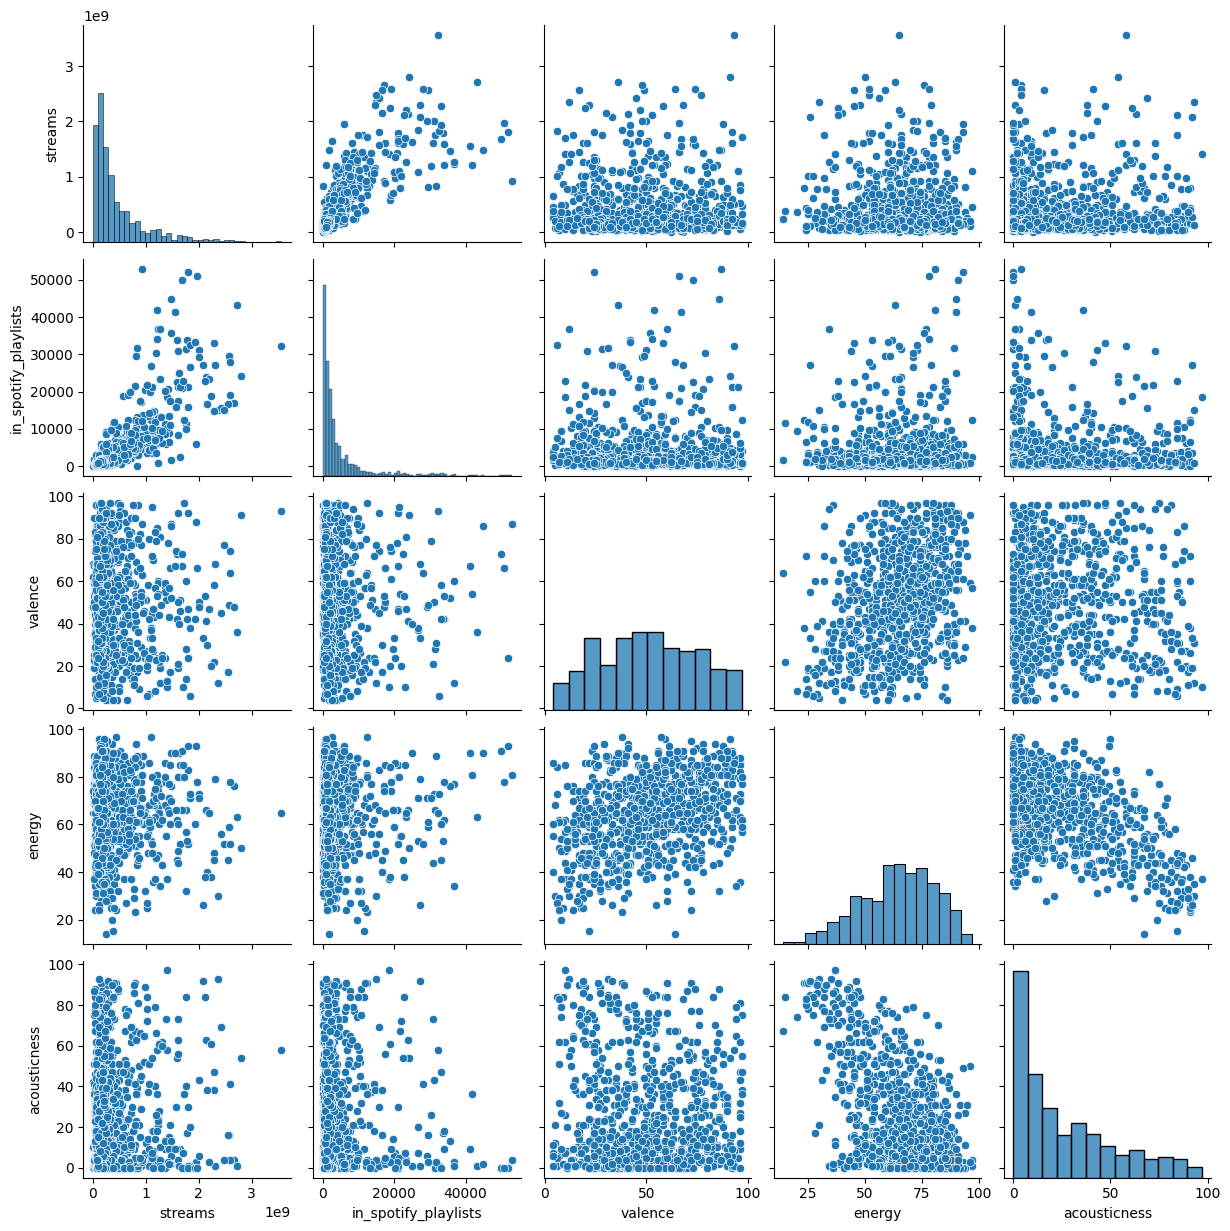

In [69]:
sns.pairplot(df2.drop(['danceability'], axis=1))
plt.show()

### Equation: 
streams^ = -1.735*10^-17 + 0.7816(in_spotify_playlists) - 0.0112(valence) - 0.0520(energy) + 0.0230(acousticness)

With an R^2 value of 0.6525035165026112 this model has a relatively good fit for the test datset. Since the explanatory variable 'danceability' was dropped it suggests some level of overfitting with its inclusion. There does not appear to be any strong, linear relationships among the remaining explanatory variables so multicollinearity should not be an issue. Since the model is standardized the importance of an explanatory variable can be interpreted from its slope's magnitude; therefore, the 'in_spotify_playlists' variable has the most importance when predicting the streams of a song on Spotify based on this model.

## 7. Conclusion

Since the R^2 value is above .65 I would recommend my best model to be used by the aforementioned parties that might be interested in it; however, I would caution absolute trust in its determinations.

I cannot say with absolute certainty that my best model is also the best model possible since there are many other models not explored in this analysis: LASSO, Forward Selection Algorithm, Ridge Regression, Elastic Net, models with more explanatory variables from the dataset, etc. A more complete analysis of the variables I chose may have opted to include other feature selection models rather than just finding the best of one type.

In future work I would do additional feature selection models to potentially determine a linear regression model with a higher test R^2 and therefore a better performance with new datasets.